GC1


# 1. Perkenalan

## Identifikasi Masalah
* Nama : Iqbal Awis Nurdiansyah
* Batch : RMT-19

Latar belakang : Saya adalah seorang data scientis yang akan membuat model untuk mengklasifikasikan income bracket dari sumber `Google Cloud Platform`. dataset yang akan dipakai adalah database `ml_datasets` ditabel `cencus_adult_income`

# 2. Querry SQL

select age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country,  income_bracket
from `bigquery-public-data.ml_datasets.census_adult_income`
where workclass not like  '%?%' and hours_per_week < 100 limit 37981;

# 3. Import Libraries

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from scipy.stats import chi2_contingency

# Preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

# Model
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

#evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

#Saving
import joblib
import pickle
import json


# 4. Data Loading

In [2]:
#Load 10 data teratas
df=pd.read_csv('h8dsft_P1G2_Iqbal.csv')
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [3]:
#Load 10 data terbawah
df.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30715,23,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,24,Vietnam,<=50K
30716,22,Private,Some-college,10,Never-married,Tech-support,Other-relative,Asian-Pac-Islander,Female,0,0,32,United-States,<=50K
30717,25,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Cambodia,<=50K
30718,22,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
30719,48,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K
30724,20,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,0,0,20,South,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  int64 
 10  capital_loss    30725 non-null  int64 
 11  hours_per_week  30725 non-null  int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In [5]:
df.duplicated(keep=False).sum()

5224

In [6]:
df[df.duplicated(keep=False)]


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
29,44,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
31,44,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
73,61,Private,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
89,61,Private,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
115,42,Private,9th,5,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,22,Private,Some-college,10,Never-married,Other-service,Other-relative,Black,Male,0,0,20,United-States,<=50K
30566,24,Private,Some-college,10,Never-married,Sales,Other-relative,Black,Female,0,0,40,United-States,<=50K
30567,24,Private,Some-college,10,Never-married,Sales,Other-relative,Black,Female,0,0,40,United-States,<=50K
30615,21,Private,Some-college,10,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated(keep=False).sum()

0

# 5.EDA

In [9]:
#memisahkan kolom katagorikal
cat_cols = list(df.select_dtypes(include = 'object'))
print(len(cat_cols))
print('')
print(cat_cols)

9

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket']


In [10]:
#memisahkan kolom numerikal 
num_cols = list(df.select_dtypes(include='number'))
print(len(num_cols))
print('')
print(num_cols)

5

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [11]:
#income berdasarkan sex
df.groupby('sex')['income_bracket'].count().sort_values(ascending=False)

sex
 Male      18371
 Female     9093
Name: income_bracket, dtype: int64

`Male` merupakan jenis **sex**/ kelamin dengan kelas income_bracket >50k terbanyak

In [12]:
sex=df.sex.value_counts().to_frame()
sex

,sex
Male,18371
Female,9093


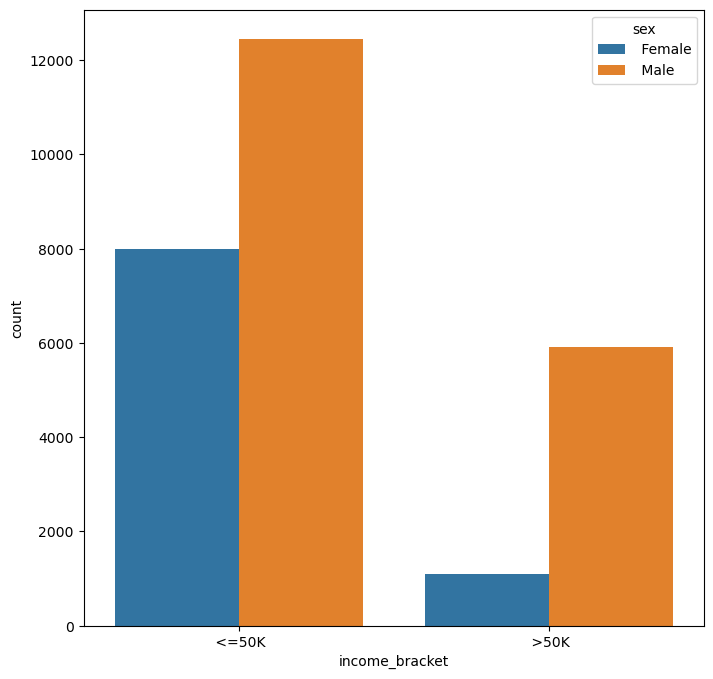

In [13]:
#Pembagian Sex berdasarkan income bracket
plt.figure(figsize=(8,8))
sns.countplot(x='income_bracket',hue='sex', data=df)
plt.show()

In [14]:
marital = df.groupby(['income_bracket','marital_status'])['income_bracket'].count().to_frame()
marital

income_bracket
income_bracket marital_status                        
 <=50K          Divorced                         3600
                Married-AF-spouse                  11
                Married-civ-spouse               6743
                Married-spouse-absent             356
                Never-married                    8101
                Separated                         882
                Widowed                           750
 >50K           Divorced                          454
                Married-AF-spouse                  10
                Married-civ-spouse               5902
                Married-spouse-absent              33
                Never-married                     476
                Separated                          66
                Widowed                            80

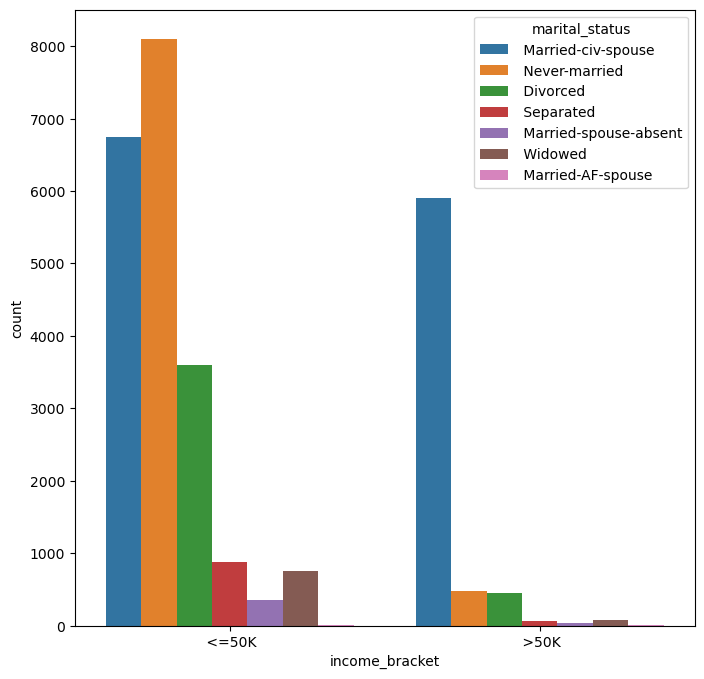

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='income_bracket',hue='marital_status', data=df)
plt.show()

In [16]:
race=df['race'].value_counts().to_frame()
race

,race
White,23130
Black,2827
Asian-Pac-Islander,973
Amer-Indian-Eskimo,286
Other,248


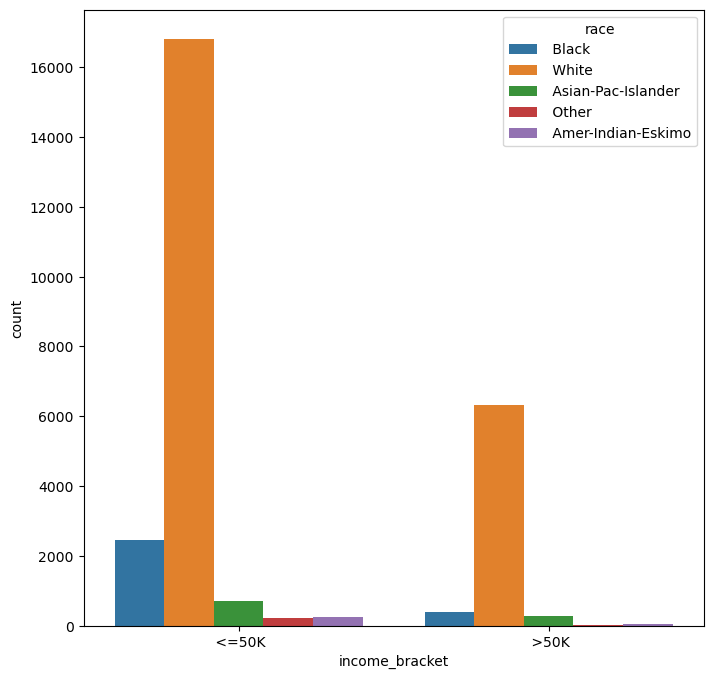

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(x='income_bracket',hue='race', data=df)
plt.show()

# 6. Feature Engineering

In [30]:
#copy dataframe
df_new=df.copy()

## Data Cleaning

In [31]:
# Mengganti nilai '?' dengan 'unknown
df_new.replace(' ?', np.nan, inplace = True)
df_new.fillna('Unknown', inplace = True)

## Split Feature (x) dan target (y)

Membagi data kedalam variabel x dan y

In [32]:
# Splitting `X` and `y`

#Drop kolom education karena sudah ada kolom education_num
X = df_new.drop(['income_bracket', 'education'], axis=1)
y = df_new['income_bracket']
X

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States
1,77,Private,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States
2,38,Private,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti
3,28,Private,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States
4,37,Private,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
30720,46,Private,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India
30721,45,Private,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines
30722,32,Private,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece
30723,30,Self-emp-not-inc,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (21971, 12)
Test Size  :  (5493, 12)


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
30389,23,Self-emp-inc,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
29060,48,Private,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
2628,36,Private,8,Separated,Other-service,Unmarried,White,Female,0,0,40,Mexico
22200,30,Private,16,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States
2764,57,Private,2,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,22,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
29808,37,Private,10,Never-married,Sales,Not-in-family,White,Male,0,0,60,United-States
7539,32,Self-emp-inc,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States
1227,20,Private,6,Married-spouse-absent,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
21938,48,State-gov,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,46,United-States


## Handling cardinality

Membuat fungsi untuk melakukan cardinality terhadap katagori negara menjadi katagori benua

In [34]:
def card_america(df_new, a):
    df_new[a] = np.where(df_new[a].str.contains('United-States'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Haiti'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Dominican-Republic'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Puerto-Rico'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Canada'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Guam'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Mexico'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Peru'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Columbia'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Ecuador'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Trinadad&Tobago'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('El-Salvador'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Guatemala'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('South'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Jamaica'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Cuba'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Nicaragua'), 'America', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Honduras'), 'America', df_new[a])
def card_eu(df_new, a):
    df_new[a] = np.where(df_new[a].str.contains('Italy'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Germany'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Portugal'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('England'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Poland'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Yugoslavia'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('France'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Ireland'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Greece'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Holand-Netherlands'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Scotland'), 'Europe', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Hungary'), 'Europe', df_new[a])
def card_asian(df_new, a):
    df_new[a] = np.where(df_new[a].str.contains('India'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Philippines'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('China'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Laos'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Japan'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Vietnam'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Thailand'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Hong'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Cambodia'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Iran'), 'Asian', df_new[a])
    df_new[a] = np.where(df_new[a].str.contains('Taiwan'), 'Asian', df_new[a])


In [35]:
def card_occ(df, a):
    df[a] = np.where(df[a].str.contains('serv'), 'Entry-Level', df[a])
    df[a] = np.where(df[a].str.contains('Farm'), 'Entry-Level', df[a])
    df[a] = np.where(df[a].str.contains('clean'), 'Entry-Level', df[a])
    df[a] = np.where(df[a].str.contains('Mach'), 'Mid-Level', df[a])
    df[a] = np.where(df[a].str.contains('Tech'), 'Mid-Level', df[a])
    df[a] = np.where(df[a].str.contains('Adm'), 'Mid-Level', df[a])
    df[a] = np.where(df[a].str.contains('Sales'), 'Mid-Level', df[a])
    df[a] = np.where(df[a].str.contains('Craft'), 'Mid-Level', df[a])
    df[a] = np.where(df[a].str.contains('Trans'), 'Mid-Level', df[a])
    df[a] = np.where(df[a].str.contains('manager'), 'High-Level', df[a])
    df[a] = np.where(df[a].str.contains('special'), 'High-Level', df[a])
    df[a] = np.where(df[a].str.contains('Unknown'), 'Unknown', df[a])
    df[a] = np.where(df[a].str.contains('Armed'), 'Army', df[a])
    

In [36]:
def card_wc(df, a):
    df[a] = np.where(df[a].str.contains('gov'), 'Gov', df[a])
    df[a] = np.where(df[a].str.contains('Private'), 'Private', df[a])
    df[a] = np.where(df[a].str.contains('Self'), 'Self-Emp', df[a])
    df[a] = np.where(df[a].str.contains('Never'), 'Never_Worked', df[a])
    df[a] = np.where(df[a].str.contains('Without'), 'Without_Pay', df[a])
    

#### Handling data `train`

In [37]:
# Handdling native_country

#America
card_america(X_train, 'native_country')

#Europe
card_eu(X_train, 'native_country')

#Asian
card_asian(X_train, 'native_country')

In [39]:
X_train.native_country.value_counts()

America    20638
Asian        497
Unknown      439
Europe       397
Name: native_country, dtype: int64

In [46]:
# Handling occupation
card_occ(X_train,'occupation')
X_train.occupation.value_counts()

Mid-Level      11040
High-Level      6145
Entry-Level     4772
Army               8
Unknown            6
Name: occupation, dtype: int64

In [45]:
# Handling Workclass

card_wc(X_train,'workclass')
X_train.workclass.value_counts()

Private         15661
Gov              3463
Self-Emp         2828
Without_Pay        13
Never_Worked        6
Name: workclass, dtype: int64

#### Handling Data `Test`

In [47]:
# Handdling native_country

#America
card_america(X_test, 'native_country')

#Europe
card_eu(X_test, 'native_country')

#Asian
card_asian(X_test, 'native_country')

In [48]:
X_test.native_country.value_counts()

America    5147
Asian       137
Unknown     114
Europe       95
Name: native_country, dtype: int64

In [50]:
# Handling occupation
card_occ(X_test, 'occupation')
X_test.occupation.value_counts()

Mid-Level      2889
High-Level     1459
Entry-Level    1143
Army              1
Unknown           1
Name: occupation, dtype: int64

In [53]:
# Handling Workclass

card_wc(X_test,'workclass')
X_test.workclass.value_counts()

Private         3960
Gov              795
Self-Emp         736
Without_Pay        1
Never_Worked       1
Name: workclass, dtype: int64

## Handling Outlier

In [54]:
# Membuat Function Untuk Menampilkan Grafik Histogram dan Boxplot
def diagnostic_plots(df, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', df[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', df[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

Skewness Value of age : 0.5202556285981261
Skewness Value of hours_per_week : 0.3438732908692328
Skewness Value of capital_gain : 11.388411192053203
Skewness Value of capital_loss : 4.272090832850889


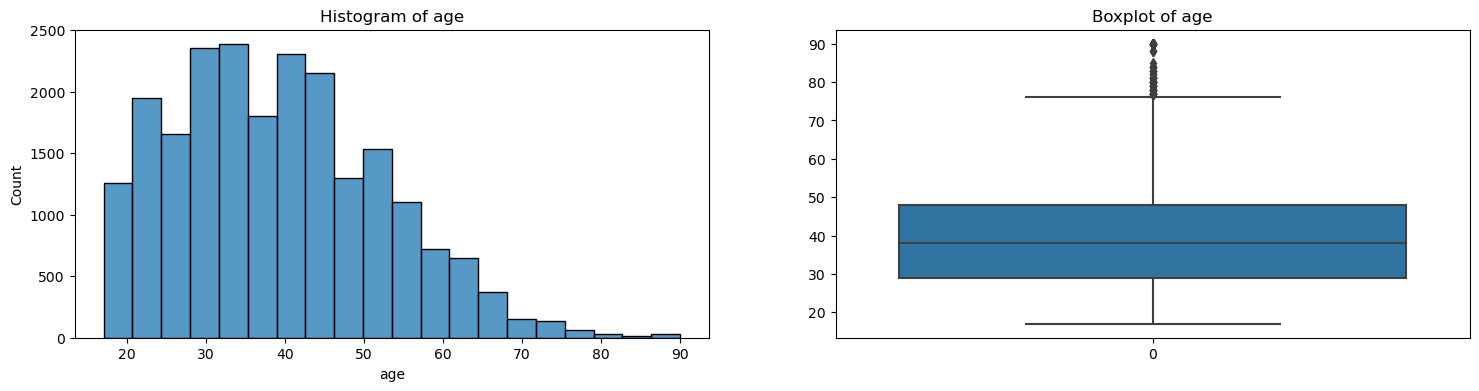

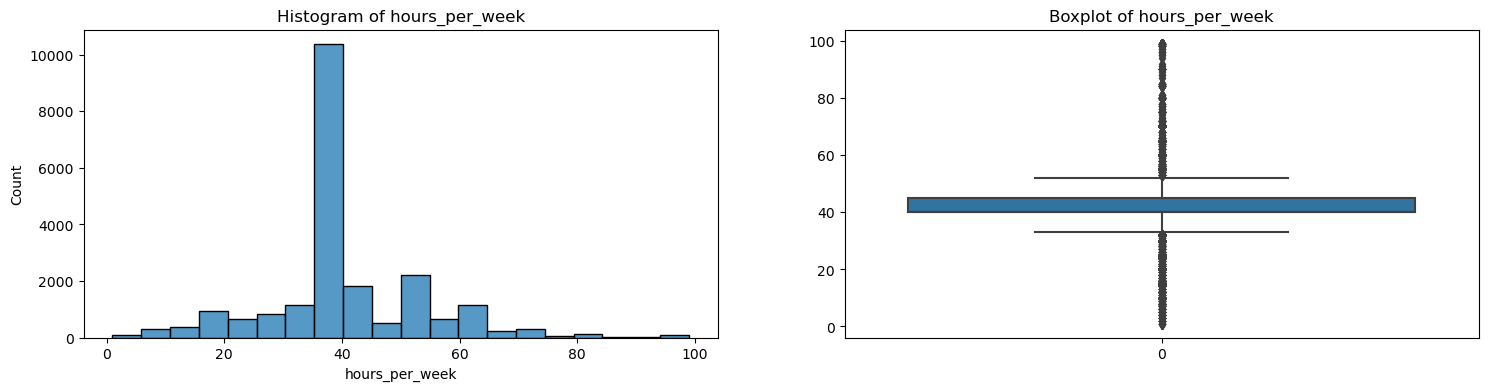

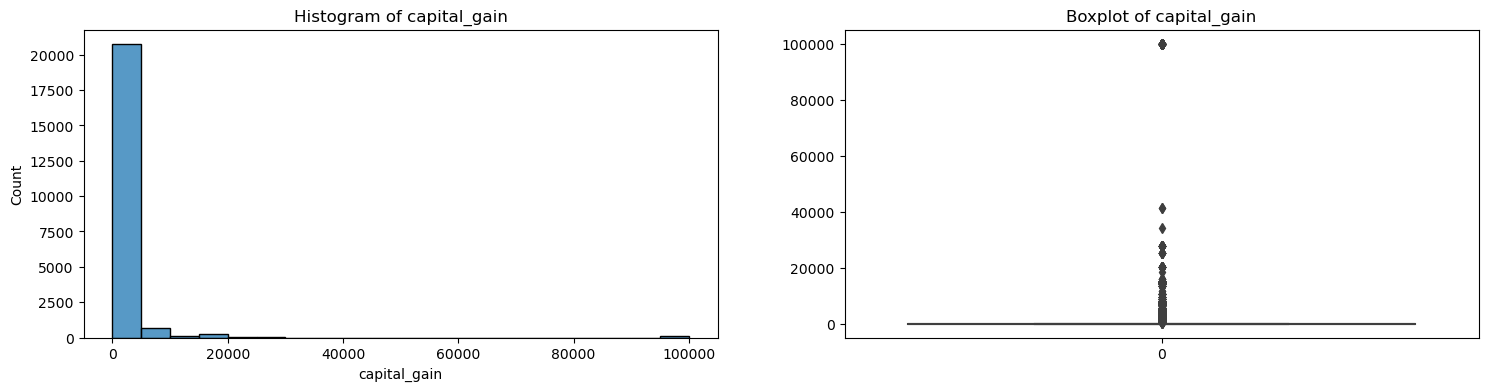

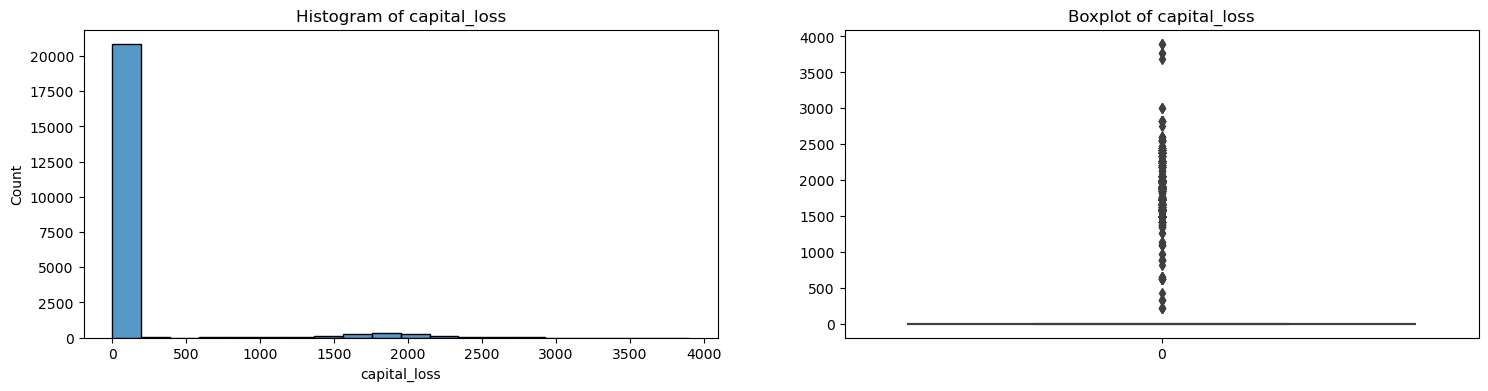

<Figure size 1800x400 with 0 Axes>

In [55]:
#Menampilkan grafik histogram
diagnostic_plots(X_train, 'age', 'hours_per_week', 'capital_gain', 'capital_loss')

Data Train : 

* dari grafik `histogram` kita dapat lihat bahwa distribusi data tidak normal
* dari `boxplot` dapat terlihat bahwa data memiliki outlier

## Caping Outlier

Berdasarkan asumsi pribadi nilai outlier merupakan `Natural Outlier`

In [56]:
winsoriser= Winsorizer(capping_method='iqr',
             tail='both',
             fold=1.5,
             variables=['age' , 'hours_per_week'])
winsoriser.fit(X_train)
X_train_t = winsoriser.transform(X_train)

In [57]:
#  
print('Left Tail Caps : ', winsoriser.left_tail_caps_)
print('Right Tail Caps : ', winsoriser.right_tail_caps_)

Left Tail Caps :  {'age': 0.5, 'hours_per_week': 32.5}
Right Tail Caps :  {'age': 76.5, 'hours_per_week': 52.5}


## Missing Value

In [30]:
# Check Missing Value X_train
X_train.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [31]:
# Check Missing Value X_test
X_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [62]:
X_train.native_country.value_counts()

America    20638
Asian        497
Unknown      439
Europe       397
Name: native_country, dtype: int64

In [63]:
X_train.occupation.value_counts()

Mid-Level      11040
High-Level      6145
Entry-Level     4772
Army               8
Unknown            6
Name: occupation, dtype: int64

* Handling missing value pada feature tidak dilakukan karena tidak ada nya nilai null didalam data . Sementara ada nilai **Unknown** didalam data `native_country` dan `occupation`
* Karena data `occupation` dan `native_country` memiliki hubungan dengan data lain maka dikatakan bahwa jenis missing value pada data tersebut adalah `Missing Not at Random` **(MNAR)**


## Spliting Numerikal dan katagorikal

#### CAtagorical

In [64]:
cat_columns=list(X.select_dtypes(include= 'object'))
print(len(cat_columns))
print('')
print(cat_columns)

7

['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


#### Numerikal

In [65]:
num_columns=X.columns[X.dtypes != 'object'].tolist()
print(len(num_columns))
print('')
print(num_columns)

5

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [162]:
num_columns_sc = ['age', 'capital_gain','capital_loss', 'hours_per_week']
num_columns_nsc = ['education_num']

In [67]:
# SPlit Train-Set and Test-set

X_train_num = X_train_t[num_columns_sc]
X_test_num = X_test[num_columns_sc]

X_train_cat = X_train_t[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head()

,age,capital_gain,capital_loss,hours_per_week
30389,23.0,0,0,50.0
29060,48.0,0,0,40.0
2628,36.0,0,0,40.0
22200,30.0,0,0,32.5
2764,57.0,0,0,32.5


## Scaling

In [68]:
# Scaling Menggunakan MixMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [69]:
# Menampilkan dataframe yang sudah di scaling pada data train

X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns= num_columns_sc)
X_train_num_scaled

,age,capital_gain,capital_loss,hours_per_week
0,0.100840,0.0,0.000000,0.875
1,0.521008,0.0,0.000000,0.375
2,0.319328,0.0,0.000000,0.375
3,0.218487,0.0,0.000000,0.000
4,0.672269,0.0,0.000000,0.000
...,...,...,...,...
21966,0.336134,0.0,0.000000,1.000
21967,0.252101,1.0,0.000000,0.375
21968,0.050420,0.0,0.000000,0.375
21969,0.521008,0.0,0.487692,0.675


In [70]:
X_train_ednum = X_train_t[num_columns_nsc]
X_train_ednum.shape

(21971, 1)

In [71]:
# Reset Index
X_train_num_scaled.reset_index(drop=True, inplace=True)
X_train_ednum.reset_index(drop=True, inplace=True)

In [72]:
# MEnggabungkan Data Numerik
X_train_num_final=pd.concat([X_train_num_scaled, X_train_ednum], axis=1)
X_train_num_final

,age,capital_gain,capital_loss,hours_per_week,education_num
0,0.100840,0.0,0.000000,0.875,10
1,0.521008,0.0,0.000000,0.375,10
2,0.319328,0.0,0.000000,0.375,8
3,0.218487,0.0,0.000000,0.000,16
4,0.672269,0.0,0.000000,0.000,2
...,...,...,...,...,...
21966,0.336134,0.0,0.000000,1.000,10
21967,0.252101,1.0,0.000000,0.375,9
21968,0.050420,0.0,0.000000,0.375,6
21969,0.521008,0.0,0.487692,0.675,16


In [73]:
# Menggabungkan Data numerik test
X_test_num_scaled=pd.DataFrame(X_test_num_scaled, columns=num_columns_sc)
X_test_num_scaled

,age,capital_gain,capital_loss,hours_per_week
0,0.319328,1.00000,0.000000,-0.625
1,0.302521,0.00000,0.000000,1.375
2,0.487395,0.00000,0.000000,0.575
3,0.739496,0.00000,0.483846,0.375
4,0.420168,0.02407,0.000000,0.375
...,...,...,...,...
5488,0.773109,0.00000,0.000000,0.375
5489,0.722689,0.00000,0.000000,0.375
5490,0.319328,0.02463,0.000000,0.375
5491,0.285714,0.00000,0.000000,0.375


In [74]:
# Data ed_num
X_test_ednum = X_test[num_columns_nsc]
X_test_ednum

,education_num
26318,10
13167,9
14945,14
7752,9
15742,11
...,...
25421,10
12379,9
29596,10
8055,9


In [75]:
# Reset Index
X_test_num_scaled.reset_index(drop= True, inplace=True)
X_test_ednum.reset_index(drop= True, inplace=True)

In [76]:
X_test_num_final = pd.concat([X_test_num_scaled, X_test_ednum], axis=1)
X_test_num_final.head(3)

,age,capital_gain,capital_loss,hours_per_week,education_num
0,0.319328,1.0,0.0,-0.625,10
1,0.302521,0.0,0.0,1.375,9
2,0.487395,0.0,0.0,0.575,14


## Encoding

#### Ordinal Encoding

In [78]:
# MEngurutkan data
ord_cols=['sex','occupation']
sex_cat = [' Male', ' Female']
occ_cat = ['Unknown', 'Army', 'Entry-Level', 'Mid-Level', 'High-Level']


In [79]:
#Melakukan Ordinal encoder
OrdEnc = OrdinalEncoder(categories = [sex_cat,occ_cat], dtype='int')

X_train_cat_ord = OrdEnc.fit_transform(X_train_cat[ord_cols])
X_test_cat_ord = OrdEnc.transform(X_test_cat[ord_cols])
X_train_cat_ord


array([[0, 4],
       [1, 3],
       [1, 2],
       ...,
       [0, 2],
       [1, 4],
       [1, 4]])

In [80]:
#Mengubah Shape data target
y_train = np.array(y_train).reshape(-1 , 1)
y_test = np.array(y_test).reshape(-1 , 1)

#Melakukan Ordinal encoder
OrdEnc = OrdinalEncoder(categories= 'auto', dtype='int')

y_train_ord = OrdEnc.fit_transform(y_train)
y_test_ord = OrdEnc.transform(y_test)
y_train_ord


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [81]:
# Mengubah data array menjadi dataframe
X_train_cat_ord = pd.DataFrame(X_train_cat_ord, columns = ord_cols)
X_test_cat_ord = pd.DataFrame(X_test_cat_ord, columns = ord_cols)
y_train_ord = pd.DataFrame(y_train_ord, columns = ['income_bracket'])
y_test_ord = pd.DataFrame(y_test_ord, columns = ['income_bracket'])

In [82]:
# Reset Index
X_train_cat_ord.reset_index(drop = True, inplace = True)
X_test_cat_ord.reset_index(drop = True, inplace = True)
y_train_ord.reset_index(drop = True, inplace = True)
y_test_ord.reset_index(drop = True, inplace = True)

#### One Hot Encoding

In [83]:
# filter kolom
ohe_cols = ['workclass', 'marital_status' , 'relationship', 'race', 'native_country']

In [84]:
# Melakukan One Hot Encoder pada data kategori
OHEnc = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cat_ohe = OHEnc.fit_transform(X_train_cat[ohe_cols])
X_test_cat_ohe = OHEnc.transform(X_test_cat[ohe_cols])

X_train_cat_ohe

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [85]:
# Membuat features baru berdasarkan value dari kolom yang digunakan

feature_names=OHEnc.get_feature_names_out(input_features=ohe_cols)

X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, columns=feature_names)
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, columns=feature_names)

In [86]:
# Reset Index

X_train_cat_ohe.reset_index(drop = True, inplace=True)
X_test_cat_ohe.reset_index(drop = True, inplace=True)


In [87]:
# Menampilkan 3 data teratas
X_train_cat_ohe.head(3)

,workclass_Gov,workclass_Never_Worked,workclass_Private,workclass_Self-Emp,workclass_Without_Pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_country_America,native_country_Asian,native_country_Europe,native_country_Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [88]:
# Menggabungkan data ordinal dan one hot encoding

X_train_new=pd.concat([X_train_cat_ord, X_train_cat_ohe], axis=1)
X_train_new.head(3)

,sex,occupation,workclass_Gov,workclass_Never_Worked,workclass_Private,workclass_Self-Emp,workclass_Without_Pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_country_America,native_country_Asian,native_country_Europe,native_country_Unknown
0,0,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [89]:
# Dataset
X_test_new = pd.concat([X_test_cat_ord, X_test_cat_ohe], axis=1)

# Menampilkan 3 data teratas
X_test_new.head(3)

,sex,occupation,workclass_Gov,workclass_Never_Worked,workclass_Private,workclass_Self-Emp,workclass_Without_Pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_country_America,native_country_Asian,native_country_Europe,native_country_Unknown
0,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Menggabungkan data numerik dan katagorikal

In [90]:
# Menggabungkan Data numerik dan katagorikal

#Data train
X_train_final=pd.concat([X_train_num_final, X_train_new], axis=1)

#Data test
X_test_final = pd.concat([X_test_num_final, X_test_new], axis=1)

In [91]:
X_train_final.head(5)

,age,capital_gain,capital_loss,hours_per_week,education_num,sex,occupation,workclass_Gov,workclass_Never_Worked,workclass_Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_country_America,native_country_Asian,native_country_Europe,native_country_Unknown
0,0.100840,0.0,0.0,0.875,10,0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.521008,0.0,0.0,0.375,10,1,3,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.319328,0.0,0.0,0.375,8,1,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.218487,0.0,0.0,0.000,16,0,4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.672269,0.0,0.0,0.000,2,0,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [92]:
X_test_final.head(3)

,age,capital_gain,capital_loss,hours_per_week,education_num,sex,occupation,workclass_Gov,workclass_Never_Worked,workclass_Private,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native_country_America,native_country_Asian,native_country_Europe,native_country_Unknown
0,0.319328,1.0,0.0,-0.625,10,0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.302521,0.0,0.0,1.375,9,0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.487395,0.0,0.0,0.575,14,1,4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Feature Selection

### Checking Corelation

#### Pearson

In [93]:
# Pearson

Xy_train = pd.concat([X_train_final, y_train_ord], axis=1)
Xy_corr = Xy_train.corr().income_bracket.sort_values(ascending= False)

In [94]:
#menampilkan data korelasi teratas dari 0
print(Xy_corr[Xy_corr>0])

income_bracket                        1.000000
marital_status_ Married-civ-spouse    0.445231
relationship_ Husband                 0.400620
education_num                         0.334834
occupation                            0.305100
hours_per_week                        0.259236
capital_gain                          0.227534
age                                   0.225298
capital_loss                          0.149862
relationship_ Wife                    0.124666
workclass_Self-Emp                    0.093782
race_ White                           0.091334
workclass_Gov                         0.052591
native_country_Asian                  0.021710
marital_status_ Married-AF-spouse     0.016039
native_country_Europe                 0.014495
race_ Asian-Pac-Islander              0.009421
Name: income_bracket, dtype: float64


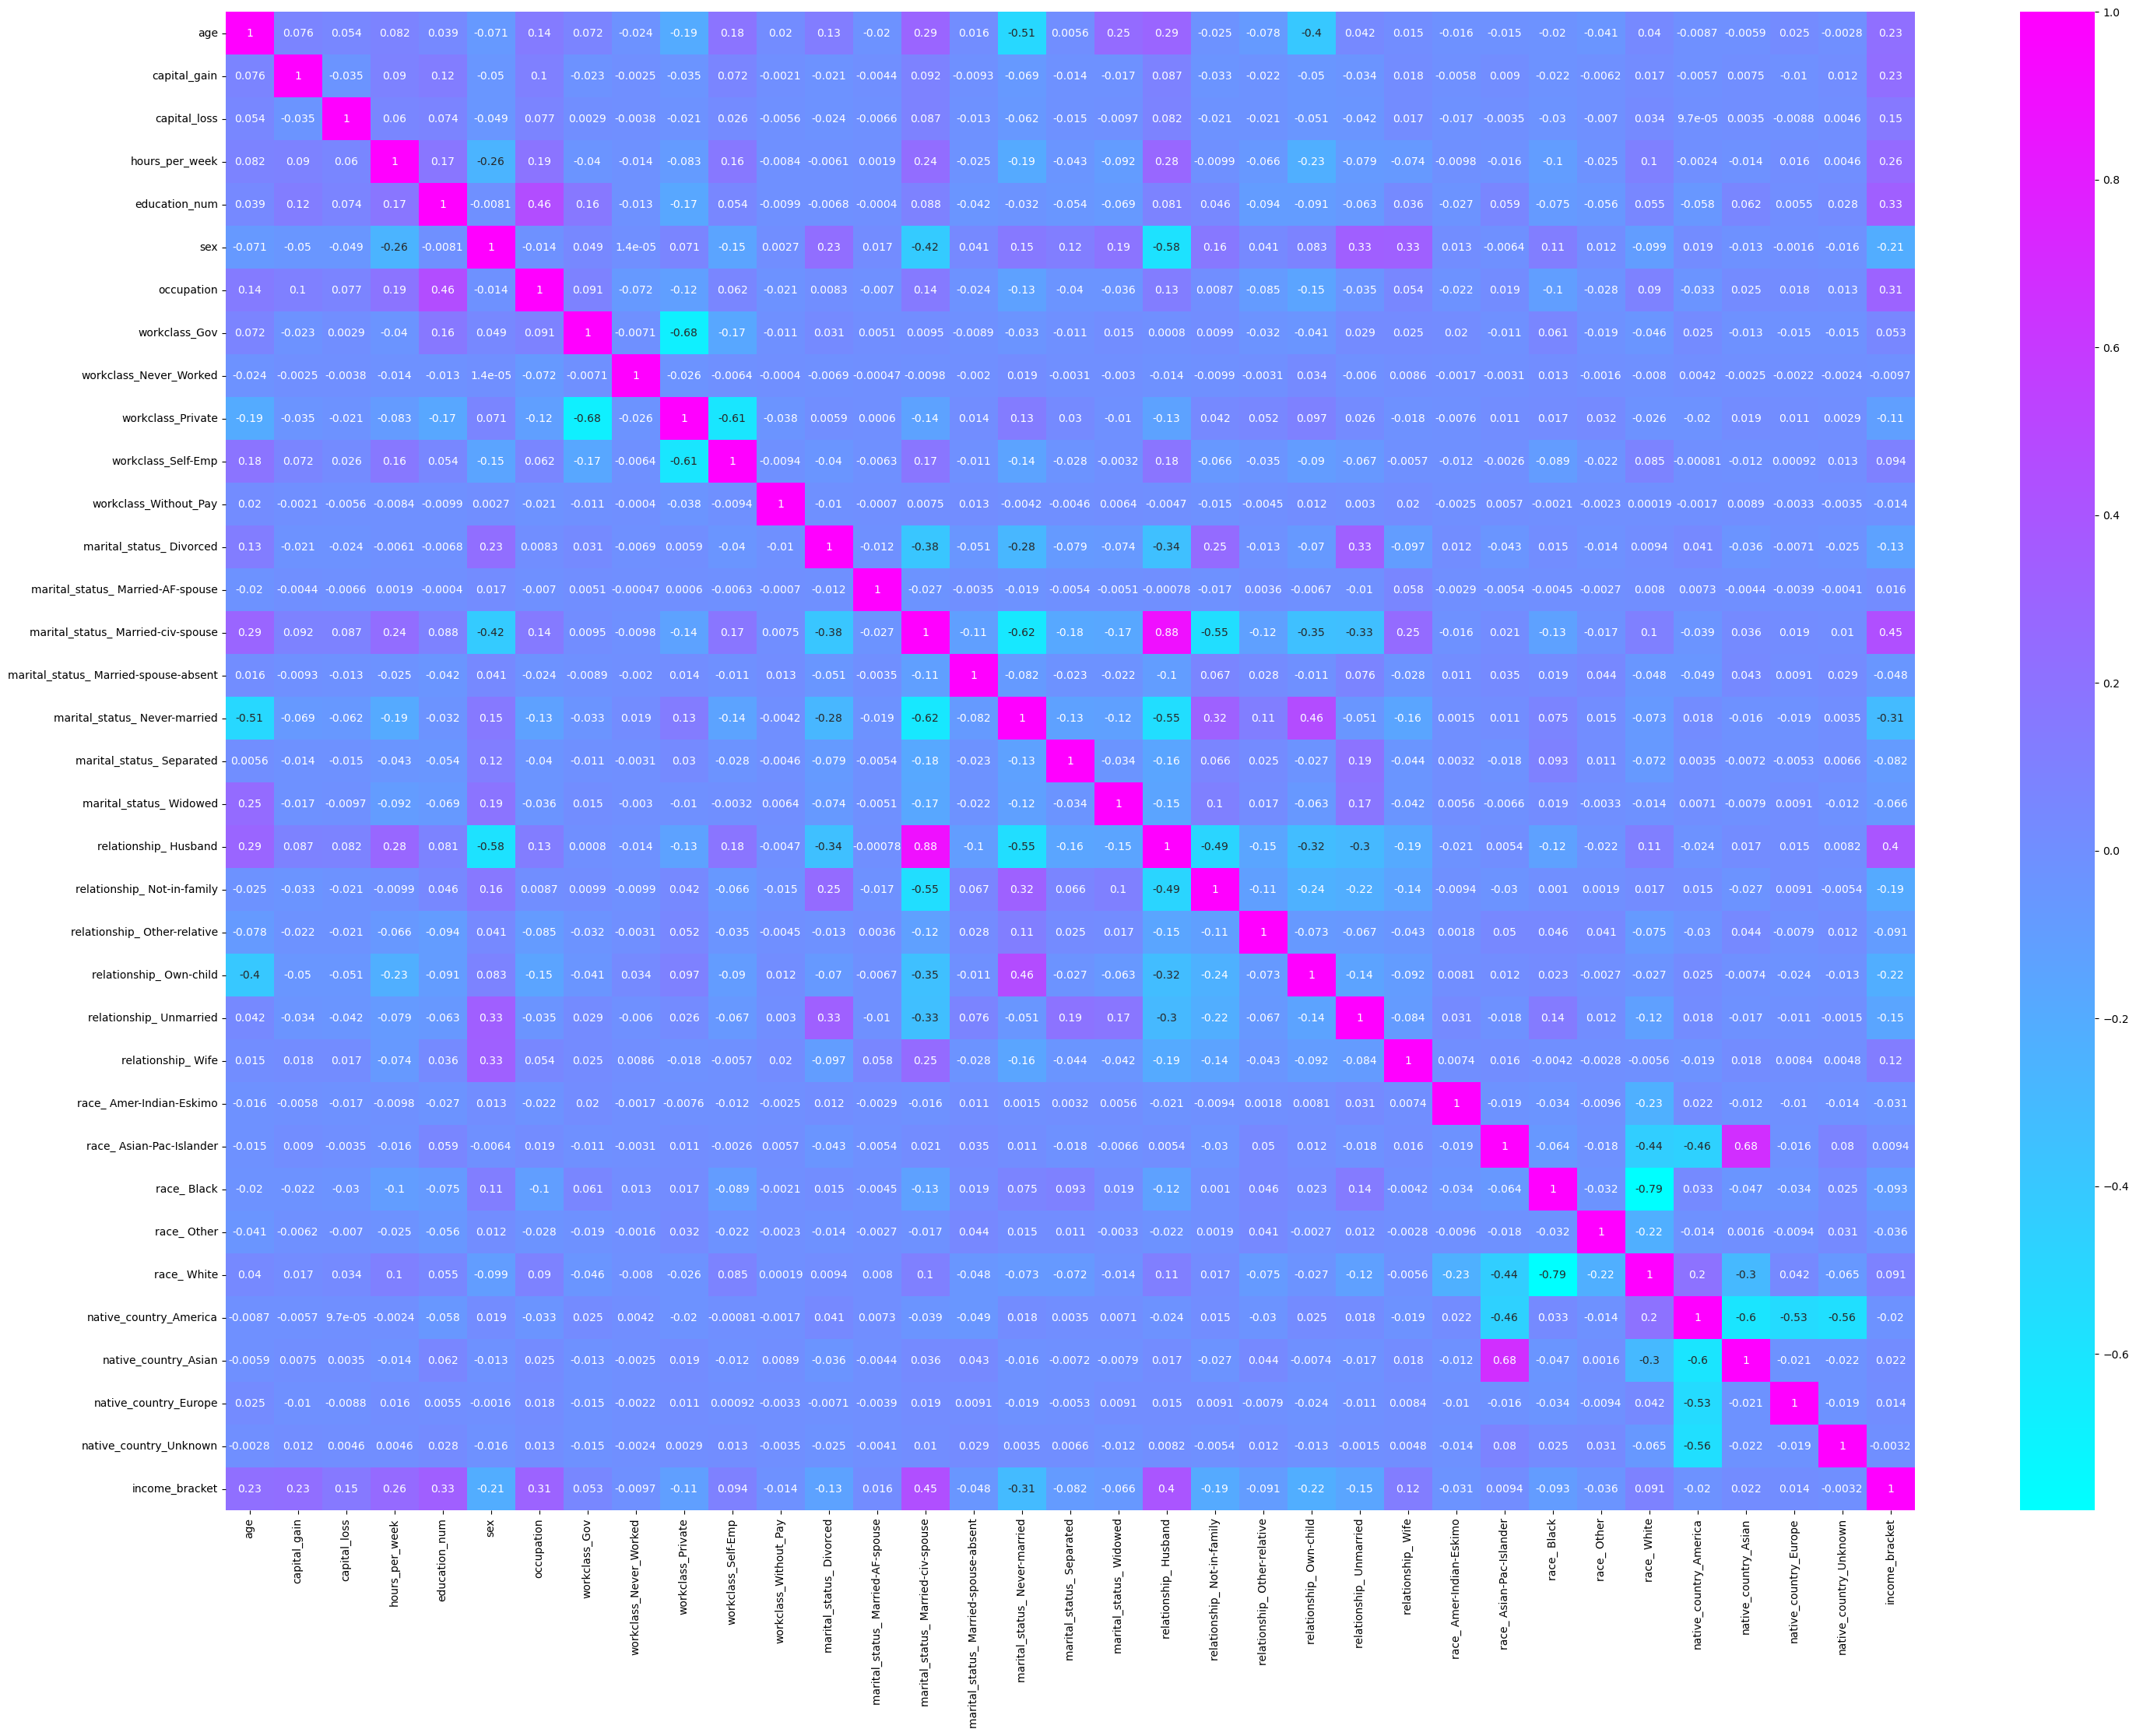

In [95]:
#Menampilkan Grafik heat map korelasi pada Data Numerikal
f, ax = plt.subplots(1,1 , figsize=(35,25))
ax = sns.heatmap(Xy_train.corr(), annot= True, cmap='cool')


 korelasi  `pearson` menghasilkan feature dapat digunakan yaitu 'marital_status_ Married-civ-spouse',
'relationship_ Husband', 'education_num', 'hours_per_week', 'capital_gain', 'age', 'occupation', 'capital_loss', 'relationship_ Wife'

#### chi2square

In [102]:
### chi2squre


chi_scores, p_values = [], []
for col in X_train_cat.columns:
    cont = pd.crosstab(X_train_cat[col], y)
    chi2, p, dof, ex = chi2_contingency(cont)
    chi_scores.append(chi2)
    p_values.append(p)

# create a DataFrame to show the results
results = pd.DataFrame({'feature': X_train_cat.columns, 'chi2_score': chi_scores, 'p_value': p_values})
print(results)

          feature   chi2_score        p_value
0       workclass   303.327764   2.074671e-64
1  marital_status  4417.898912   0.000000e+00
2      occupation  2178.808587   0.000000e+00
3    relationship  4558.325748   0.000000e+00
4            race   251.807162   2.656094e-53
5             sex  1008.321055  2.789818e-221
6  native_country    15.388935   1.512711e-03


Feature yang akan digunakan hanya feature yang nilai p-valuenya <0.05

#### Multicoreniality

In [103]:
# FUngsi menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_final.columns
    vif["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [108]:
calc_vif(X_train_final)

c:\Users\maddi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
17,marital_status_ Separated,inf
18,marital_status_ Widowed,inf
32,native_country_Europe,inf
31,native_country_Asian,inf
30,native_country_America,inf
29,race_ White,inf
28,race_ Other,inf
27,race_ Black,inf
26,race_ Asian-Pac-Islander,inf
25,race_ Amer-Indian-Eskimo,inf


hasil korelasi : feature yang digunakan 'sex', 'age', 'education_num', 'occupation', 'hours_per_week', 'capital_gain', 'capital_loss' karena nilai VIP < 5

# 7. Model Definition

In [110]:
# LogisticRegression

log_model = LogisticRegression()

In [115]:
# SVM
svm_model=(SVC)

# 8. Model Training

untuk kasus ini saya menggunakan LogisticRegression untuk memcari best parameter

In [122]:
# Menentukan grid_parameter
grid_parameter = {'C' : [0.2, 0.4 , 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] , 'solver' :['ibfgs' , 'liblinear'], 
                  'random_state' : [7]}
# Gunakan gridsearch
grid = GridSearchCV(LogisticRegression(), grid_parameter, verbose=3, refit=True, scoring='accuracy', cv=5, return_train_score= True, n_jobs=1)
grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END C=0.2, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.2, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.2, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.2, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.2, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.2, random_state=7, solver=liblinear;, score=(train=0.826, test=0.835) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.2, random_state=7, solver=liblinear;, score=(train=0.829, test=0.826) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.2, random_state=7, solver=liblinear;, score=(train=0.828, test=0.831) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.2, random_state=7, solver=liblinear;, score=(train=0.829, test=0.827) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.2, random_state=7, solver=liblinear;, score=(train=0.830, test=0.820) total time=   0.2s
[CV 1/5] END C=0.4, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.4, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.4, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.4, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.4, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.4, random_state=7, solver=liblinear;, score=(train=0.831, test=0.838) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.4, random_state=7, solver=liblinear;, score=(train=0.832, test=0.830) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.4, random_state=7, solver=liblinear;, score=(train=0.832, test=0.835) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.4, random_state=7, solver=liblinear;, score=(train=0.832, test=0.831) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.4, random_state=7, solver=liblinear;, score=(train=0.833, test=0.823) total time=   0.1s
[CV 1/5] END C=0.6, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.6, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.6, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.6, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.6, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.6, random_state=7, solver=liblinear;, score=(train=0.833, test=0.838) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.6, random_state=7, solver=liblinear;, score=(train=0.833, test=0.833) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.6, random_state=7, solver=liblinear;, score=(train=0.832, test=0.835) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.6, random_state=7, solver=liblinear;, score=(train=0.834, test=0.833) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.6, random_state=7, solver=liblinear;, score=(train=0.835, test=0.825) total time=   0.1s
[CV 1/5] END C=0.8, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.8, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.8, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.8, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.8, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.8, random_state=7, solver=liblinear;, score=(train=0.833, test=0.837) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.8, random_state=7, solver=liblinear;, score=(train=0.834, test=0.834) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.8, random_state=7, solver=liblinear;, score=(train=0.834, test=0.836) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.8, random_state=7, solver=liblinear;, score=(train=0.834, test=0.835) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.8, random_state=7, solver=liblinear;, score=(train=0.836, test=0.828) total time=   0.2s
[CV 1/5] END C=1.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1.0, random_state=7, solver=liblinear;, score=(train=0.835, test=0.836) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1.0, random_state=7, solver=liblinear;, score=(train=0.835, test=0.835) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1.0, random_state=7, solver=liblinear;, score=(train=0.836, test=0.836) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1.0, random_state=7, solver=liblinear;, score=(train=0.836, test=0.836) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1.0, random_state=7, solver=liblinear;, score=(train=0.837, test=0.828) total time=   0.1s
[CV 1/5] END C=2.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=2.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=2.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=2.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=2.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=2.0, random_state=7, solver=liblinear;, score=(train=0.837, test=0.839) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=2.0, random_state=7, solver=liblinear;, score=(train=0.837, test=0.839) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=2.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.837) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=2.0, random_state=7, solver=liblinear;, score=(train=0.837, test=0.839) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=2.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.831) total time=   0.2s
[CV 1/5] END C=3.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=3.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=3.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=3.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=3.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=3.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.841) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=3.0, random_state=7, solver=liblinear;, score=(train=0.837, test=0.839) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=3.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.837) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=3.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.838) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=3.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.832) total time=   0.2s
[CV 1/5] END C=4.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=4.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=4.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=4.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=4.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=4.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.841) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=4.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=4.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.837) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=4.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=4.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.832) total time=   0.3s
[CV 1/5] END C=5.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=5.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=5.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=5.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=5.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=5.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.841) total time=   0.5s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=5.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=5.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.838) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=5.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.1s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=5.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.834) total time=   0.2s
[CV 1/5] END C=6.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=6.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=6.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=6.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=6.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=6.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.841) total time=   0.6s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=6.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=6.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.837) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=6.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=6.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.834) total time=   0.4s
[CV 1/5] END C=7.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=7.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=7.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=7.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=7.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=7.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.841) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=7.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=7.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.837) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=7.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.839) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=7.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.835) total time=   0.2s
[CV 1/5] END C=8.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=8.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=8.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=8.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=8.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=8.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.841) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=8.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.839) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=8.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.837) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=8.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.839) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=8.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.835) total time=   0.5s
[CV 1/5] END C=9.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=9.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=9.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=9.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=9.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=9.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.841) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=9.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.839) total time=   0.5s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=9.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.837) total time=   0.5s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=9.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.839) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=9.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.835) total time=   0.4s
[CV 1/5] END C=10.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=10.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=10.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=10.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=10.0, random_state=7, solver=ibfgs;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=10.0, random_state=7, solver=liblinear;, score=(train=0.838, test=0.841) total time=   0.4s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=10.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.840) total time=   0.5s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=10.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.837) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10.0, random_state=7, solver=liblinear;, score=(train=0.839, test=0.839) total time=   0.2s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=10.0, random_state=7, solver=liblinear;, score=(train=0.840, test=0.835) total time=   0.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\maddi\anaconda3\lib\site

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                               7.0, 8.0, 9.0, 10.0],
                         'random_state': [7],
                         'solver': ['ibfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [123]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)

LogisticRegression(C=10.0, random_state=7, solver='liblinear')
{'C': 10.0, 'random_state': 7, 'solver': 'liblinear'}
27


In [125]:
# membuat variabel untuk model Logistic Regression
best_logreg = LogisticRegression(C=10, random_state=7 , solver='liblinear')
best_logreg.fit(X_train_final,y_train)

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, random_state=7, solver='liblinear')

In [144]:
best_logreg= LogisticRegression(C=10, random_state=7 , solver='liblinear').fit(X_train_final,y_train)

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
logreg_train_p = best_logreg.predict(X_train_final)
logreg_test_p = best_logreg.predict(X_test_final)

print('Training score: {:.4f}'.format(best_logreg.score(X_train_final, y_train)))
print(classification_report(y_train,logreg_train_p))
print('Test score: {:.4f}'.format(best_logreg.score(X_test_final, y_test)))
print(classification_report(y_test,logreg_test_p))

Training score: 0.8385
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     16354
        >50K       0.73      0.58      0.65      5617

    accuracy                           0.84     21971
   macro avg       0.80      0.75      0.77     21971
weighted avg       0.83      0.84      0.83     21971

Test score: 0.8347
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4089
        >50K       0.72      0.58      0.64      1404

    accuracy                           0.83      5493
   macro avg       0.79      0.75      0.77      5493
weighted avg       0.83      0.83      0.83      5493



* Training score menunjukan angka `0.83` atau 83% kemungkinan memprediksi dengan benar.
* Berbedaan Train dan test tidak terlalu jauh dan dapat dikatakan tergolong `Good-fit`

#### Confusion matriks data train

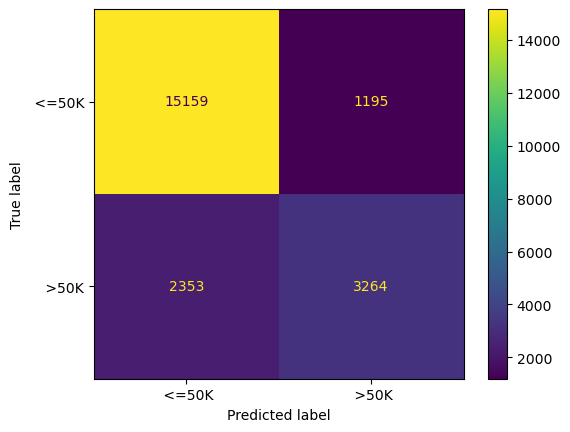

In [136]:
# menampilkan matriks akurasi prediksi
cm_train=confusion_matrix(y_train , y_pred_train_log, labels=best_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels= best_logreg.classes_)
disp.plot()
plt.show()

#### Confusion matriks data test

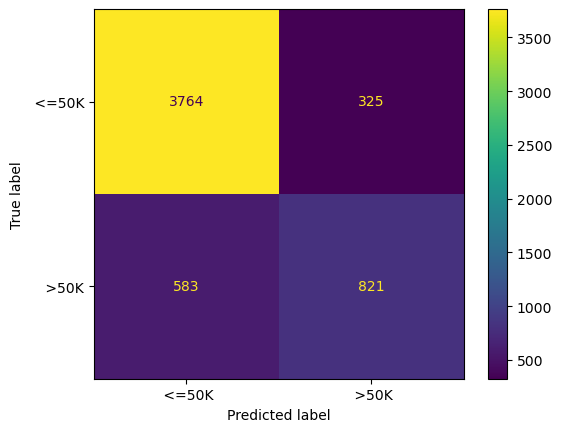

In [138]:
# menampilkan matriks akurasi prediksi
cm_train=confusion_matrix(y_test , y_pred_test_log, labels=best_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels= best_logreg.classes_)
disp.plot()
plt.show()

## Support Vector Machine (SVC)

untuk pemodelan SVC saya lakukan menggunakan tuning SVM untuk memcari best parameter

In [140]:
# Menentukan grid_parameter
grid_parameters = {'C' : [0.5, 1.0, 1.5], 'gamma' : ['auto', 'scaled'], 'kernel' : ['poly', 'liniear', 'rbf']}

# Gunakan gridsearch
grid = GridSearchCV(SVC(), grid_parameters, verbose = 3, refit = True, scoring = 'accuracy',
                    cv = 5, return_train_score = True, n_jobs = 1)
grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.835, test=0.836) total time=  31.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.833, test=0.838) total time= 1.1min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.837, test=0.835) total time= 1.1min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.836, test=0.831) total time=  32.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.5, gamma=auto, kernel=poly;, score=(train=0.834, test=0.830) total time=  58.5s
[CV 1/5] END C=0.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.813, test=0.820) total time= 1.1min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.813, test=0.817) total time=  49.7s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.814, test=0.813) total time= 1.4min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.813, test=0.808) total time= 1.5min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.5, gamma=auto, kernel=rbf;, score=(train=0.814, test=0.810) total time= 1.1min
[CV 1/5] END C=0.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=0.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=0.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=0.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=0.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=0.5, gamma=scaled, ker

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1.0, gamma=auto, kernel=poly;, score=(train=0.838, test=0.838) total time=  59.8s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1.0, gamma=auto, kernel=poly;, score=(train=0.836, test=0.838) total time= 1.1min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1.0, gamma=auto, kernel=poly;, score=(train=0.840, test=0.836) total time=  40.8s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1.0, gamma=auto, kernel=poly;, score=(train=0.839, test=0.835) total time= 1.6min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1.0, gamma=auto, kernel=poly;, score=(train=0.838, test=0.835) total time=  43.4s
[CV 1/5] END C=1.0, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1.0, gamma=auto, kernel=rbf;, score=(train=0.815, test=0.821) total time= 1.5min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1.0, gamma=auto, kernel=rbf;, score=(train=0.816, test=0.820) total time= 1.1min


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1.0, gamma=auto, kernel=rbf;, score=(train=0.816, test=0.815) total time=  48.5s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1.0, gamma=auto, kernel=rbf;, score=(train=0.816, test=0.809) total time=  45.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1.0, gamma=auto, kernel=rbf;, score=(train=0.816, test=0.812) total time=  47.2s
[CV 1/5] END C=1.0, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.0, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.0, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.0, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.0, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.0, gamma=scaled, ker

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1.5, gamma=auto, kernel=poly;, score=(train=0.839, test=0.838) total time=  53.6s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1.5, gamma=auto, kernel=poly;, score=(train=0.838, test=0.840) total time=  32.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1.5, gamma=auto, kernel=poly;, score=(train=0.841, test=0.838) total time=  38.3s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1.5, gamma=auto, kernel=poly;, score=(train=0.841, test=0.834) total time=  41.6s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1.5, gamma=auto, kernel=poly;, score=(train=0.840, test=0.838) total time=  53.3s
[CV 1/5] END C=1.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.5, gamma=auto, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1.5, gamma=auto, kernel=rbf;, score=(train=0.818, test=0.823) total time=  37.6s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1.5, gamma=auto, kernel=rbf;, score=(train=0.818, test=0.821) total time=  37.0s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1.5, gamma=auto, kernel=rbf;, score=(train=0.818, test=0.817) total time=  38.6s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1.5, gamma=auto, kernel=rbf;, score=(train=0.818, test=0.811) total time=  27.6s


c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1.5, gamma=auto, kernel=rbf;, score=(train=0.818, test=0.812) total time= 1.1min
[CV 1/5] END C=1.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.5, gamma=scaled, kernel=poly;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END C=1.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END C=1.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END C=1.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END C=1.5, gamma=scaled, kernel=liniear;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END C=1.5, gamma=scaled, ker

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\maddi\anaconda3\lib\site-packages\sklea

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.5, 1.0, 1.5], 'gamma': ['auto', 'scaled'],
                         'kernel': ['poly', 'liniear', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [146]:
print (grid.best_estimator_)
print (grid.best_params_)
print (grid.best_index_)

SVC(C=1.5, gamma='auto', kernel='poly')
{'C': 1.5, 'gamma': 'auto', 'kernel': 'poly'}
12


In [147]:
grid.predict(X_test_final)

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [148]:
# Menampilkan dataframe hasil gridsearch terbaik
output_param = pd.DataFrame(grid.cv_results_)
output_param.sort_values("mean_test_score", ascending=False)\
[["params", "mean_test_score", "mean_train_score", "std_test_score", "std_train_score",'rank_test_score','mean_score_time']]

,params,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score,mean_score_time
12,"{'C': 1.5, 'gamma': 'auto', 'kernel': 'poly'}",0.837422,0.839846,0.001810,0.001170,1,4.096543
6,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'poly'}",0.836284,0.838332,0.001349,0.001380,2,6.897753
0,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}",0.833963,0.835112,0.002723,0.001160,3,4.945577
14,"{'C': 1.5, 'gamma': 'auto', 'kernel': 'rbf'}",0.816940,0.817874,0.004591,0.000256,4,11.588776
8,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",0.815256,0.815575,0.004452,0.000344,5,13.199497
2,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}",0.813390,0.813299,0.004318,0.000490,6,14.328681
1,"{'C': 0.5, 'gamma': 'auto', 'kernel': 'liniear'}",NaN,NaN,NaN,NaN,7,0.000000
3,"{'C': 0.5, 'gamma': 'scaled', 'kernel': 'poly'}",NaN,NaN,NaN,NaN,7,0.000000
4,"{'C': 0.5, 'gamma': 'scaled', 'kernel': 'linie...",NaN,NaN,NaN,NaN,7,0.000000
5,"{'C': 0.5, 'gamma': 'scaled', 'kernel': 'rbf'}",NaN,NaN,NaN,NaN,7,0.000000


In [149]:
best_svc = SVC( C = 1.5, gamma= 'auto' , kernel='poly')
best_svc.fit(X_train_final, y_train)

c:\Users\maddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.5, gamma='auto', kernel='poly')

In [150]:
y_pred_train = best_svc.predict(X_train_final)
y_pred_test = best_svc.predict(X_test_final)

In [151]:
# Menampilkan evaluasi akurasi prediksi
print("Evaluation: Polynomial kernel")
print('Training score: {:.4f}'.format(best_svc.score(X_train_final, y_train)))
print('Test score: {:.4f}'.format(best_svc.score(X_test_final, y_test)))

Evaluation: Polynomial kernel
Training score: 0.8400
Test score: 0.8351


# 9. Model Evaluation

#### LogReg

In [152]:
print('Training score: {:.4f}'.format(best_logreg.score(X_train_final, y_train)))
print(classification_report(y_train,logreg_train_p))

Training score: 0.8385
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     16354
        >50K       0.73      0.58      0.65      5617

    accuracy                           0.84     21971
   macro avg       0.80      0.75      0.77     21971
weighted avg       0.83      0.84      0.83     21971



In [153]:
print('Test score: {:.4f}'.format(best_logreg.score(X_test_final, y_test)))
print(classification_report(y_test,logreg_test_p))

Test score: 0.8347
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4089
        >50K       0.72      0.58      0.64      1404

    accuracy                           0.83      5493
   macro avg       0.79      0.75      0.77      5493
weighted avg       0.83      0.83      0.83      5493



#### SVM

In [154]:
print (classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90     16354
        >50K       0.78      0.52      0.62      5617

    accuracy                           0.84     21971
   macro avg       0.82      0.73      0.76     21971
weighted avg       0.83      0.84      0.83     21971



In [156]:
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      4089
        >50K       0.78      0.49      0.60      1404

    accuracy                           0.84      5493
   macro avg       0.81      0.72      0.75      5493
weighted avg       0.83      0.84      0.82      5493



Statement : Dapat dilihat bahwa model `SVM` memiliki tingkat akurasi prediksi kebih tinggi dibanding `LogisticRegression`

# 10. Model Saving

In [165]:
# Save File

# Modelling
with open('logreg_model.pkl', 'wb') as file_1:
    pickle.dump(best_logreg, file_1)

with open('svc_model.pkl', 'wb') as file_2:
    pickle.dump(best_svc, file_2)

# Pre-processing

with open('ord_encode.pkl', 'wb') as file_3:
    pickle.dump(OrdEnc, file_3)
    
with open('ohe_encode.pkl', 'wb') as file_4:
    pickle.dump(OHEnc, file_4)

with open('scale_feat.pkl', 'wb') as file_5:
    pickle.dump(scaler, file_5)

with open('winsoriser.pkl', 'wb') as file_6:
    pickle.dump(winsoriser, file_6)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'w') as file_7:
    json.dump(num_columns_sc, file_7)

with open('num_cols_nsc.txt', 'w') as file_8:
    json.dump(num_columns_nsc, file_8)
    
with open('cat_ord_cols.txt', 'w') as file_9:
    json.dump(ord_cols, file_9)
    
with open('cat_ohe_cols.txt', 'w') as file_10:
    json.dump(ohe_cols, file_10)

In [166]:
data_inference = df.sample(10, random_state = 20)

In [168]:

data_inference.to_csv('data_inference.csv', index=False)

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
    * koefisien juga dapat digunakan untuk melakukan prediksi pada data baru. Setelah model logistic regression dilatih pada data pelatihan, koefisien dari setiap variabel independen akan diperoleh dan dapat digunakan untuk memprediksi nilai probabilitas peristiwa terjadi pada data baru yang belum pernah dilihat sebelumnya.
2. Apakah yang dimaksud dengan Support Vector pada SVM?
    * Support vector adalah titik data yang paling dekat dengan hyperplane dalam support vector machine (SVM). sementara Support Vector Machine(SVM) merupakan sistem pembelajaran yang menggunakan ruang hipotesis yang berupa fungsi-fungsi linear didalam sebuah fitur yang memiliki dimensi tinggi dan dilatih dengan menggunakan algoritma pembelajaran berdasarkan teori optimasi.
3.  Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!
    * Salah satu kernel yang umum digunakan pada SVM adalah kernel Gaussian, Kernel Gaussian cocok digunakan pada masalah klasifikasi non-linear yang kompleks, karena dapat memproyeksikan data ke ruang kernel yang memiliki dimensi yang tak terbatas.


# 12. Kesimpulan


* `Male` merupakan jenis **sex**/ kelamin dengan kelas income_bracket >50k terbanyak
* `Race` white menjadi race terbanyak yang mempunyai income >50
* Model SVM lebih baik digunakan ketimbang LogisticRegression
* Logisticregression memiliki akurasi 0.83 dan good-fit antara train dengan test
* SVM memiliki tingkat akurasi 0.84 / 84 % dan good-fit antara train dan test